# **Exploratory Visualizations**

1. Import necessary libraries
2. Import dataset and store in dataframe
3. Create bar chart to visualize distribution of ratings (1-5)
4. Map labels (Ratings 1 and 2 -> 0; Ratings 3 -> 1; Ratings 4 and 5 -> 2) to sentiments (0: Negative, 1: Neutral, 2: Positive)
5. Remove unnecessary special characters using RegEx, remove stopwords, and perform stemming
6. Split and Tokenize data
7. Create bar chart to visualize sentiment labels
8. Create bar chart to visualize sentiment categories
9. Generate word cloud to visualize most common words in positive sentiment category
10. Generate word cloud to visualize most common words in negative sentiment category
11. Generate word cloud to visualize most common words in neutral sentiment category

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
# Store csv in a dataframe
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


# **Distribution of Ratings**

From this visualization, it can be seen that the most common rating is 5, followed by 4, and then 3.

<Axes: xlabel='Rating', ylabel='count'>

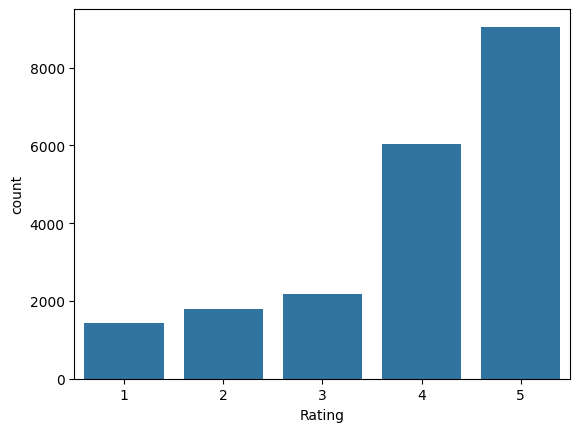

In [ ]:
# View distribution of ratings
sns.countplot(data=df, x='Rating')

In [ ]:
# Dummy-encode ratings
# Ratings 1 and 2 -> 0
# Ratings 3 -> 1
# Ratings 4 and 5 -> 2

def label_encode(rating):
  if rating == 1 or rating == 2:
    return 0
  if rating == 3:
    return 1
  if rating == 4 or rating == 5:
    return 2

# Give each new label category sentiment categories
def label_name(rating):
  if rating == 0:
    return "Negative"
  if rating == 1:
    return "Neutral"
  if rating == 2:
    return "Positive"

# Apply new encodings and add as new columns
df["Sentiment"] = df["Rating"].apply(lambda rating: label_encode(rating))
df["Sentiment_Name"] = df["Sentiment"].apply(lambda rating: label_name(rating))

In [ ]:
import re
import string
%pip install emoji
import emoji
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

nltk.download('stopwords')
stops = stopwords.words('english')
ps = PorterStemmer()
exclude = string.punctuation

def preprocess_text(text):
    # Remove html tags
    text = re.sub('<.*?>', '', text)
    # Remove URLS
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove emojis
    text = emoji.demojize(text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', exclude))
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word.lower() not in stops)
    # Stemming
    text = ' '.join([ps.stem(word) for word in text.split()])
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Remove leading/trailing spaces
    text = text.strip()
    return text

# Apply the preprocessing function to the 'Review' column
df['Review'] = df['Review'].progress_apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 20491/20491 [01:01<00:00, 330.67it/s]


In [ ]:
# Split data
X = df.drop(['Sentiment', 'Sentiment_Name', 'Rating'], axis=1) #===> Review
y = df['Sentiment']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

# Tokenize
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

X_train['Tokenization'] = X_train['Review'].progress_apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
100%|██████████| 16392/16392 [00:15<00:00, 1034.96it/s]


# **Distribution of Sentiment Labels**

From this visualization, it can be seen that the most common sentiment label is 2, which maps out to a positive sentiment, aligning with our previous findings.

<Axes: xlabel='Sentiment', ylabel='count'>

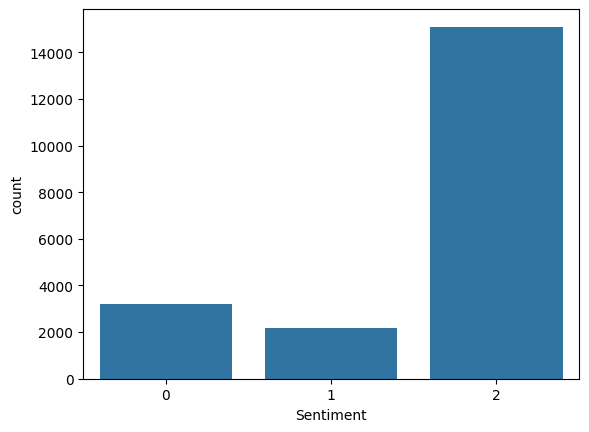

In [ ]:
# View distribution of ratings
sns.countplot(data=df, x='Sentiment')

# **Distribution of Sentiment Names**

From this visualization, it can be seen that the most common sentiment name is positive, aligning with our previous findings. There are significantly lower negative and neutral ratings than positive ratings.

<Axes: xlabel='Sentiment_Name', ylabel='count'>

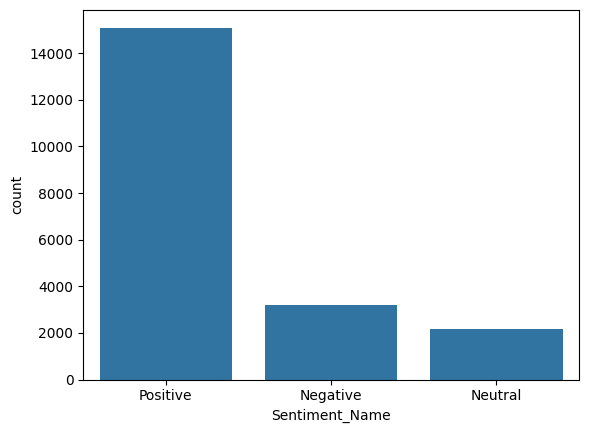

In [ ]:
# View distribution of ratings
sns.countplot(data=df, x='Sentiment_Name')

# **Word Cloud for Positive Sentiment Words**

From this visualization, it can be seen that the most commonly occurring words under the positive sentiment category are room, day, time, resort, and hotel. There are also words such as love, good, and nice which are generally positive words.

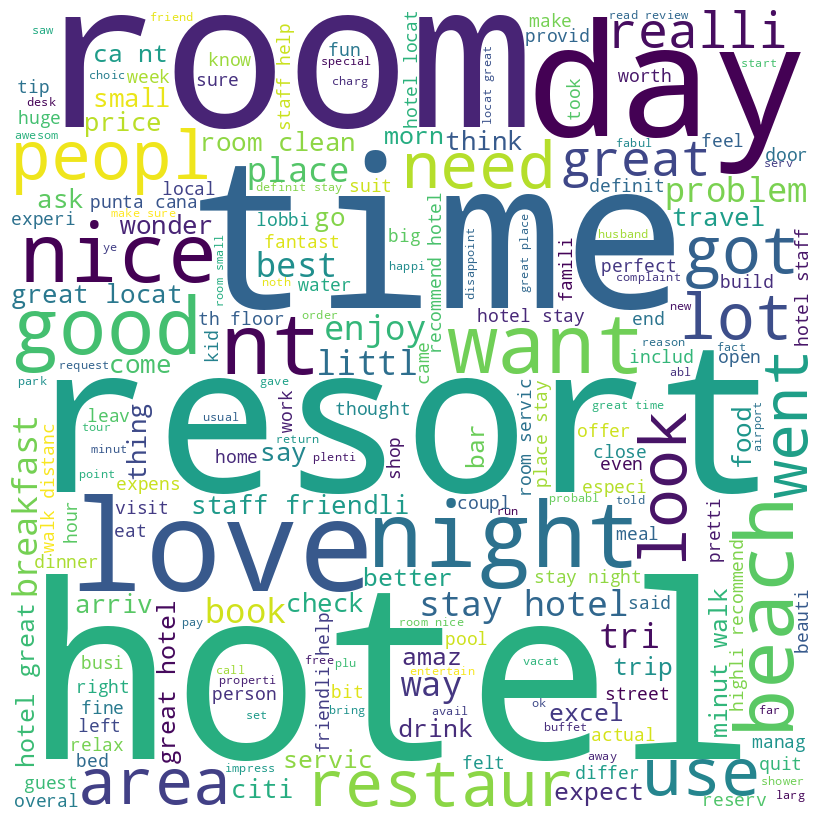

In [ ]:
# Generate word cloud for positive sentiment
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

positive_reviews = df[df['Sentiment_Name'] == 'Positive']['Review']

all_words = ' '.join(positive_reviews)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# **Word Cloud for Negative Sentiment Words**

From this visualization, it can be seen that the most commonly occurring words under the negative sentiment category are stay, day, room, and hotel, suggesting that these words are also associated with negative reviews. There are also words such as food, time, staff, and place.

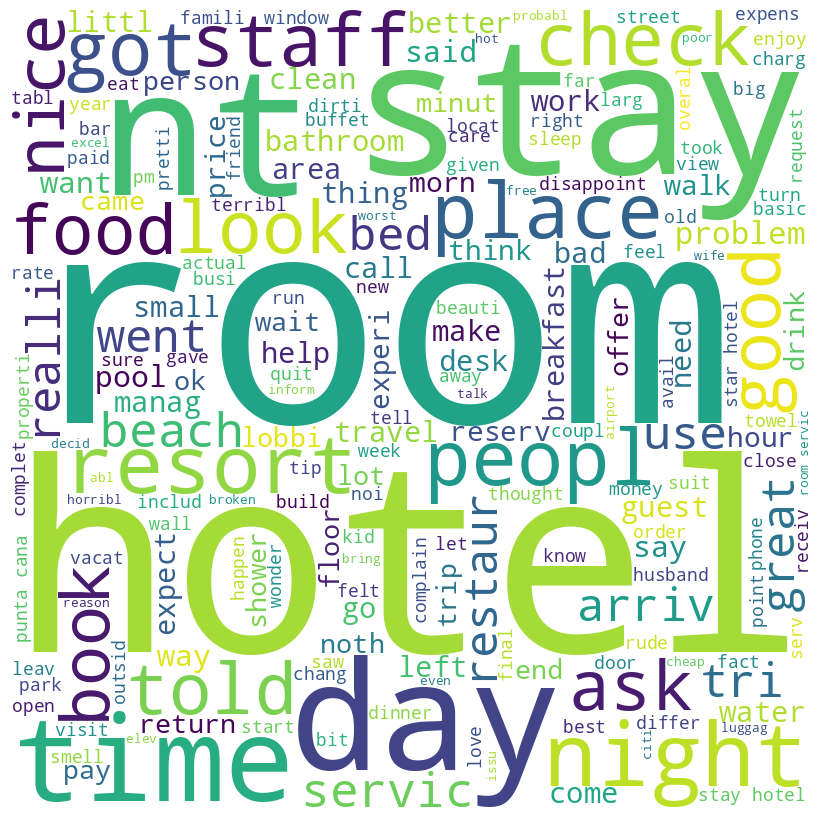

In [ ]:
negative_reviews = df[df['Sentiment_Name'] == 'Negative']['Review']

all_words = ' '.join(negative_reviews)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# **Word Cloud for Neutral Sentiment Words**

From this visualization, it can be seen that the most commonly occurring words under the neutral sentiment category are stay, day, room, and hotel, suggesting that these words are associated with all sentiment categories and are neutral words. There are also words such as good, nice, beach, and great, which could be positive, but are labeled as neutral.

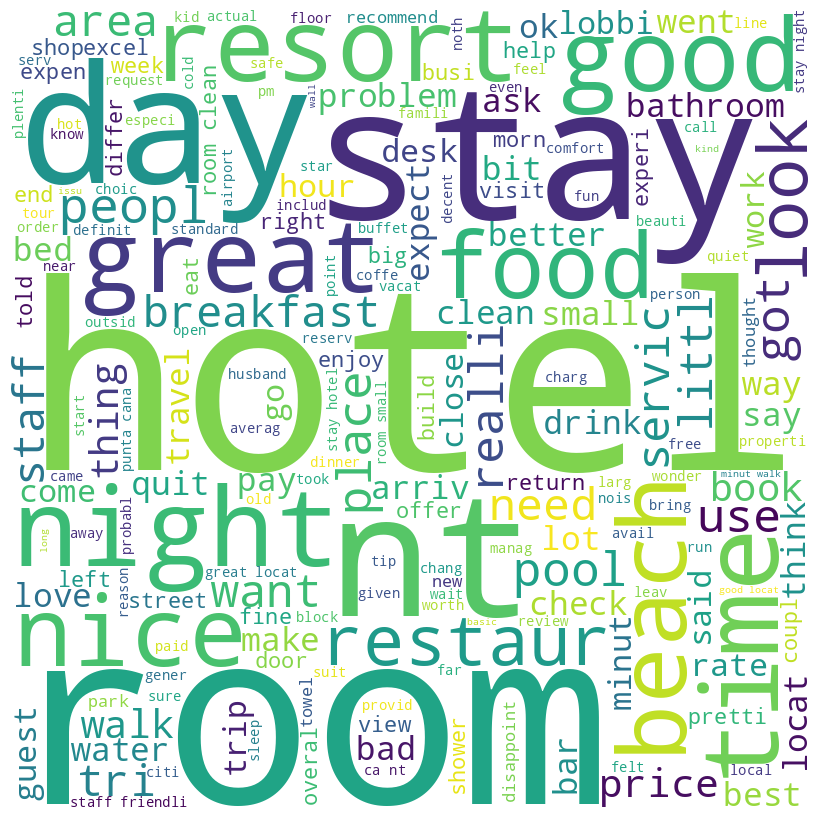

In [ ]:
neutral_reviews = df[df['Sentiment_Name'] == 'Neutral']['Review']

all_words = ' '.join(neutral_reviews)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()